In [1]:
from datasets import Adult
from NCorrFP.NCorrFP import NCorrFP

import argparse
import os
from itertools import product
from pprint import pprint

In [2]:
param = {'gamma': 2,#, 4, 8, 16, 32],
              'k': 400, #, 1000],
              'fingerprint_length': 128, #, 256, 512],#, 128, 256],  # , 128, 256],
              'n_recipients': 20,
              'sk': 100,
              'id': 0
             }

In [3]:
scheme = NCorrFP(gamma=param['gamma'], fingerprint_bit_length=param['fingerprint_length'], k=param['k'],
                             number_of_recipients=param['n_recipients'], fingerprint_code_type='tardos')

In [4]:
data = Adult()
data.dataframe.head()

,Id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data.correlated_attributes

[['age', 'relationship', 'sex', 'marital-status'],
 ['education', 'education-num']]

In [6]:
data.columns

Index(['Id', 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [7]:
fp_data = scheme.insertion(data, secret_key=param['sk'], recipient_id=param['id'],
                             correlated_attributes=data.correlated_attributes, save_computation=True, 
                           outfile='adult_fp_temp.csv')

Start the NCorr fingerprint insertion algorithm...
	gamma: 2
	correlated attributes: [['age', 'relationship', 'sex', 'marital-status'], ['education', 'education-num']]

Generated a tardos fingerprint for recipient 0: 10001111000100011101001000101101011010000110011111010100110011010101110100101101101010010111100101111000100100101000100101001111
Inserting the fingerprint...

Training balltrees in: 0.2663 sec.
Fingerprint inserted.
Runtime: 29.03 sec.
{'query_time': 10.779498100280762, 'write_time': 1.1347684860229492, 'read_time': 0.0806584358215332, 'mark_time': 15.254706382751465}


In [8]:
fp_data.head()

,Id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,301614,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
df_diff = fp_data.head(20).compare(data.dataframe.head(20))
df_diff

age        workclass             fnlwgt           marital-status  \
    self other       self    other      self     other           self   
2    NaN   NaN        NaN      NaN  301614.0  215646.0            NaN   
5    NaN   NaN        NaN      NaN       NaN       NaN       Divorced   
6    NaN   NaN  Local-gov  Private       NaN       NaN            NaN   
8    NaN   NaN        NaN      NaN       NaN       NaN            NaN   
9   25.0  42.0        NaN      NaN       NaN       NaN            NaN   
12   NaN   NaN        NaN      NaN       NaN       NaN            NaN   

                       capital-loss       income        
                 other         self other   self other  
2                  NaN          NaN   NaN    NaN   NaN  
5   Married-civ-spouse          NaN   NaN    NaN   NaN  
6                  NaN          NaN   NaN    NaN   NaN  
8                  NaN          NaN   NaN  <=50K  >50K  
9                  NaN          NaN   NaN    NaN   NaN  
12                 NaN       1564.0   0.0    NaN   NaN

In [10]:
detected_fp, votes, suspect_probvec = scheme.detection(fp_data, secret_key=param['sk'],
                                                                   primary_key='Id',
                                                                   correlated_attributes=data.correlated_attributes,
                                                                   original_columns=list(data.columns))

Start NCorr fingerprint detection algorithm ...
	gamma: 2
	k: 400
	fp length: 128
	total # recipients: 20
	correlated attributes: [['age', 'relationship', 'sex', 'marital-status'], ['education', 'education-num']]
Training balltrees in: 0.2807 sec.
Fingerprint detected: 10001111000100011101001000101101011010000110011111010100110011010101110100101101101010010111100101111000100100101000100101001111
[[3, 28], [32, 5], [34, 6], [31, 1], [6, 34], [1, 24], [3, 29], [1, 30], [39, 3], [28, 5], [23, 4], [5, 31], [27, 0], [27, 2], [32, 3], [3, 31], [4, 32], [3, 41], [38, 3], [4, 45], [31, 5], [44, 3], [0, 29], [25, 1], [41, 3], [38, 2], [3, 42], [31, 7], [7, 28], [3, 28], [44, 2], [2, 35], [37, 5], [1, 25], [3, 38], [34, 3], [6, 31], [37, 6], [26, 1], [42, 4], [29, 3], [4, 22], [4, 33], [35, 6], [30, 5], [3, 35], [2, 25], [3, 37], [4, 40], [4, 30], [42, 2], [4, 33], [36, 3], [2, 38], [29, 3], [30, 3], [3, 34], [6, 35], [26, 3], [17, 4], [5, 37], [3, 32], [29, 6], [1, 31], [31, 2], [5, 32], [36, 0

In [11]:
from NCorrFP.demo import *

In [12]:
demo = Demo(scheme)

In [13]:
len(demo.get_error_iterations())

432

In [14]:
len(demo.detection_iter_log)

5030

In [15]:
417/5030

0.08290258449304175

In [16]:
np.array(demo.get_error_iterations())[:30]

array([ 17,  21,  60,  62,  65,  92, 102, 133, 136, 144, 152, 153, 156,
       188, 189, 207, 211, 224, 236, 297, 308, 335, 351, 357, 358, 367,
       386, 389, 404, 405])

In [17]:
max(demo.detection_iter_log[26]['dist'][0])

19906.03099565556

Marking record no. 132
Marking attribute: education
The record to mark: 
    Id  age workclass  fnlwgt education  education-num      marital-status  \
65  65   36   Private  155537   HS-grad              9  Married-civ-spouse   

      occupation relationship   race   sex  capital-gain  capital-loss  \
65  Craft-repair      Husband  White  Male             0             0   

    hours-per-week native-country income  
65              40  United-States  <=50K  
------------------------------------------------------------------------------------------------------------------
Neighbourhood: education is not a correlated attribute, so we are including all attributes to find the closest neighbourhood.
Neighbours idx: [1082 3779 2097 ... 1061 1062 1035]
Neighbours dist: [[0. 0. 0. ... 0. 0. 0.]]

Now we look at the values of attribute education in this neighbourhood, and among these is our potential new value.
For this we estimate the distribution of these target values (see the plot below) 

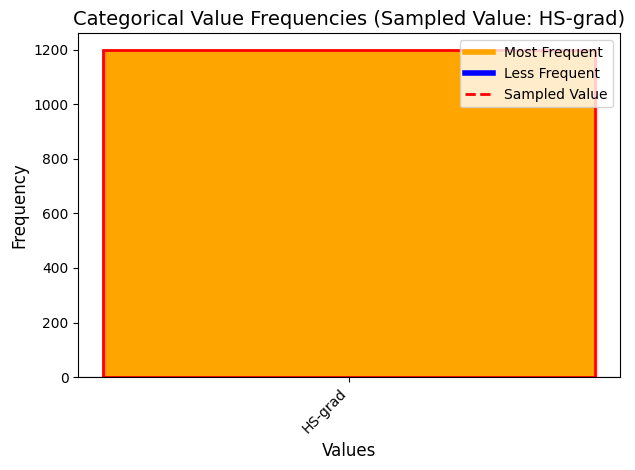

The sampled continuous value is rounded to the closest existing value from the data (to avoid perceptibility of marks) and is: HS-grad
The fingerprinted record is:
    Id  age  workclass  fnlwgt  education  education-num  marital-status  \
65  65   36          6  155537         11              9               2   

    occupation  relationship  race  sex  capital-gain  capital-loss  \
65           3             0     4    1             0             0   

    hours-per-week  native-country  income  
65              40              38       0  


In [18]:
demo.show_embedding_iteration(65)

In [19]:
demo.detection_iter_log[65]['new_value']

KeyError: 'new_value'

In [ ]:
demo.show_detection_iteration(65)